In [2]:
pip install statsmodels



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import statsmodels.api as sm


In [4]:
df=pd.read_csv("AirPassengers.csv", parse_dates=["Month"])
df.head(10)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [5]:
type(df.Month[1])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
FirstColumn = df.set_index(['Month'])

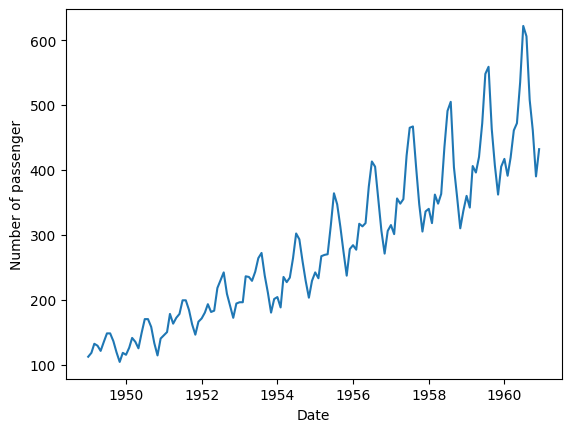

In [7]:
plt.xlabel('Date')
plt.ylabel('Number of passenger')
plt.plot(FirstColumn)

In [8]:
rolmean = FirstColumn.rolling(window=12).mean()
rolstd = FirstColumn.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

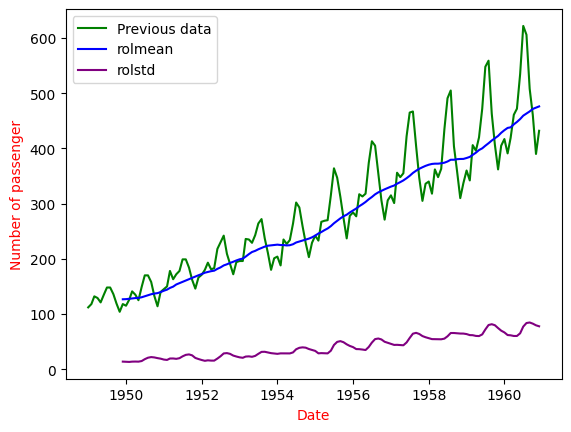

In [9]:
previous = plt.plot(FirstColumn , color = 'green', label = 'pv')
mean = plt.plot(rolmean, color = 'blue' ,label = 'mean')
std = plt.plot(rolstd , color = 'purple', label = 'std')
plt.legend(["Previous data","rolmean","rolstd"], loc='upper left')
plt.xlabel('Date', color = 'red')
plt.ylabel('Number of passenger',  color = 'red')
plt.show

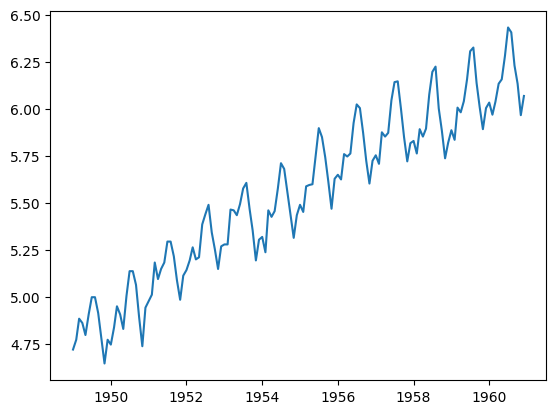

In [10]:
FirstColumn_logScale=np.log(FirstColumn)
plt.plot(FirstColumn_logScale)

In [11]:
Movingavg= FirstColumn_logScale.rolling(window=12).mean()
Movingstd= FirstColumn_logScale.rolling(window=12).mean()
print(Movingavg,Movingstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     6.124517
1960-09-01     6.132246
1960-10-01     6.142628
1960-11-01     6.148837
1960-12-01     6.154215

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     6.124517
1960-09-01     6.132246
1960-10-01     6.142628
1960-11-01     6.148837
1960-12-01     6.154215

[144 rows x 1 columns]


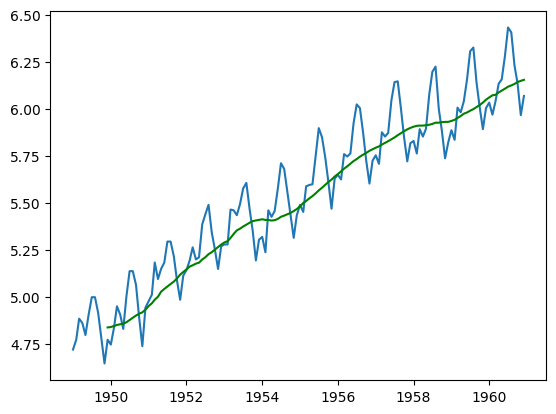

In [12]:
plt.plot(FirstColumn_logScale)
plt.plot(Movingavg , color = 'green')

In [13]:
dataset_Log_minus_moving_avg= FirstColumn_logScale-Movingavg
dataset_Log_minus_moving_avg.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [14]:
dataset_Log_minus_moving_avg.dropna(inplace=True)
dataset_Log_minus_moving_avg.head(7)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881


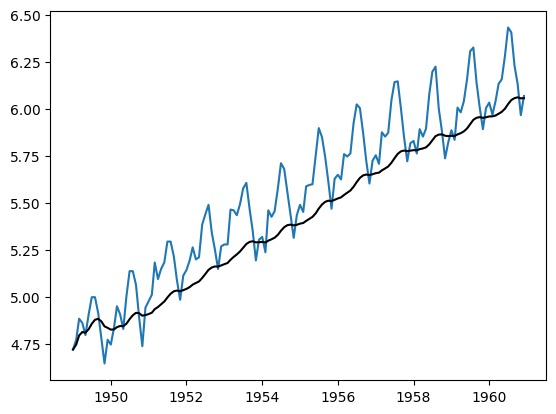

In [15]:
EWMA = FirstColumn_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(FirstColumn_logScale)
plt.plot(EWMA , color = 'black')

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(FirstColumn_logScale)

trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

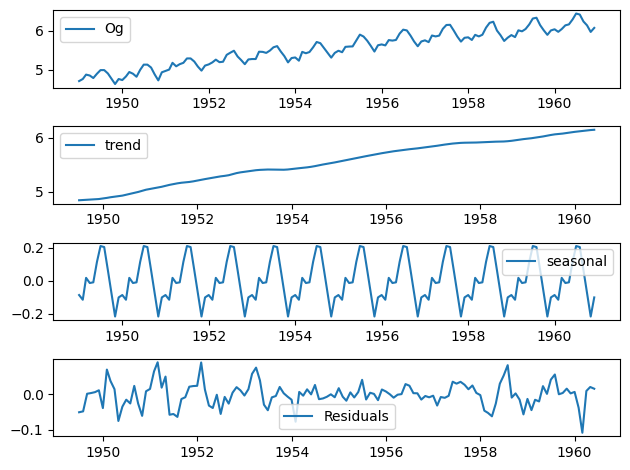

In [17]:
plt.subplot(411)
plt.plot(FirstColumn_logScale, label='Og')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

c:\Users\piyab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\piyab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\piyab\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


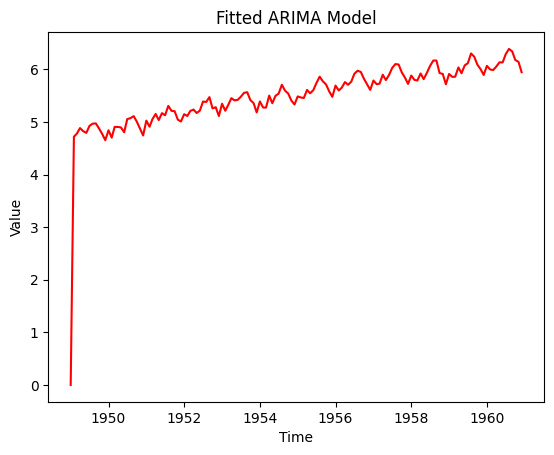

In [18]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model = ARIMA(FirstColumn_logScale, order=(2, 1, 2))
results_AR = model.fit()

fitted_values_df = results_AR.fittedvalues.to_frame(name='Fitted Values')

plt.plot(FirstColumn_logScale.index, fitted_values_df['Fitted Values'], color='red')
plt.title('Fitted ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Value')
rss = ((fitted_values_df['Fitted Values'] - FirstColumn_logScale)**2).sum()
plt.show()